# Prediction of Heart Disease within Individuals

## Load the dataset

In [1]:
import pandas as pd

file_path = 'heart_disease.csv'
data = pd.read_csv(file_path)

### Explore the dataset

In [2]:
data.head()

,age,sex,chest pain type,resting bp,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
#Get number of records and columns 
data.shape

(1190, 12)

In [4]:
#Get data types
data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp               int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [5]:
#Get number of unique values in each column
data.nunique()

age                     50
sex                      2
chest pain type          4
resting bp              67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64

## Seperate categorical and numerical columns

In [6]:
categorical_vars = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 
                    'exercise angina', 'ST slope', 'target']
numerical_vars = ['age', 'resting bp', 'cholesterol', 'max heart rate', 'oldpeak']

data[numerical_vars] = data[numerical_vars].apply(pd.to_numeric, errors = 'coerce')

## Handle duplicates

In [7]:
#Check for dulpicated count of records
data.duplicated().sum()

272

In [8]:
#Drop them
data.drop_duplicates(inplace = True, ignore_index = True)
data.shape[0]

918

## Inspect columns: 'Resting blood pressure', 'Serum cholesterol', 'ST slope'

In [9]:
print(data['resting bp'].unique(), '\n')
print(data['cholesterol'].unique(), '\n') 
print(data['ST slope'].unique())
      
##There exist zeros, whih might be the case where patient is not tested!

[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164] 

[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285 280
 192 193 308 219 257 132 226 217 303 298 256 117 295 173 315 281 309 200
 336 355 326 171 491 271 274 394 221 126 305 220 242 347 344 358 169 181
   0 236 203 153 316 311 252 458 384 258 349 142 197 113 261 310 232

In [10]:
#Replace zeros with 'null'
import numpy as np

data['resting bp'].replace(0, np.nan, inplace = True)
data['cholesterol'].replace(0, np.nan, inplace = True)
data['ST slope'].replace(0, np.nan, inplace = True)

#Check for missing values
data.isnull().sum()

age                      0
sex                      0
chest pain type          0
resting bp               1
cholesterol            172
fasting blood sugar      0
resting ecg              0
max heart rate           0
exercise angina          0
oldpeak                  0
ST slope                 1
target                   0
dtype: int64

## EDA before advanced preprocessing

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

### Distribution of heart disease existence (target)

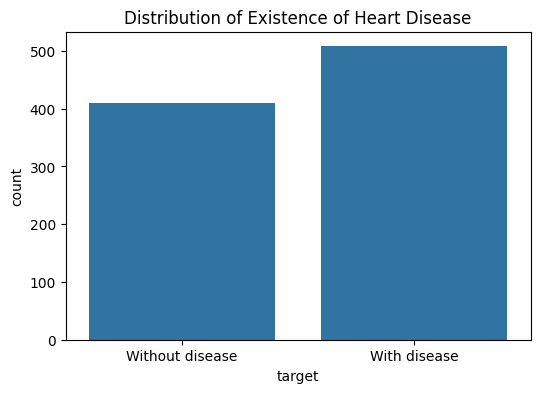

In [12]:
plt.figure(figsize = (6, 4))
sns.countplot(data = data, x = 'target')
plt.title('Distribution of Existence of Heart Disease')
plt.xticks(ticks = [0, 1], labels = ['Without disease', 'With disease'])
plt.show()

In [13]:
###Do not detect heavy class imbalancement

### Count plots for categorical variables

In [14]:
#Drop target variable from categorical variables first
categorical_vars_dropped = [col for col in categorical_vars if col != 'target']

#Ensure categorical columns are treated as it is
for column in categorical_vars_dropped:
    data[column] = data[column].astype('category')

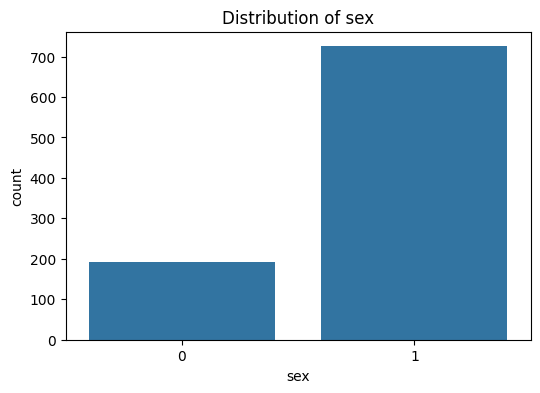

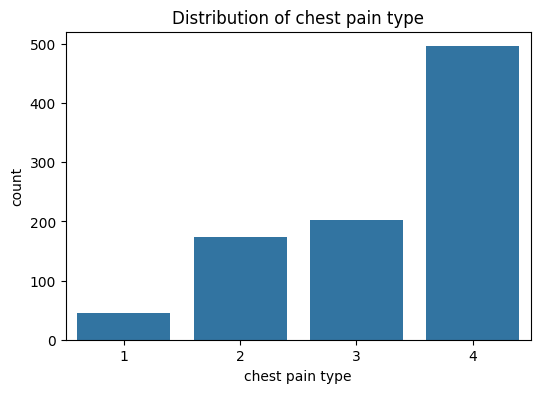

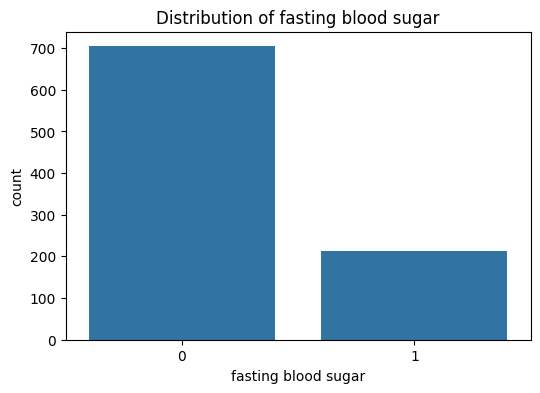

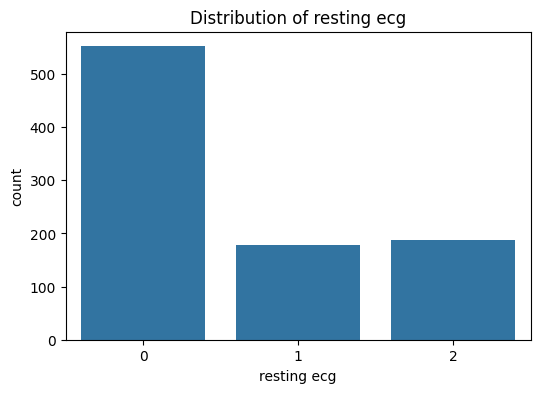

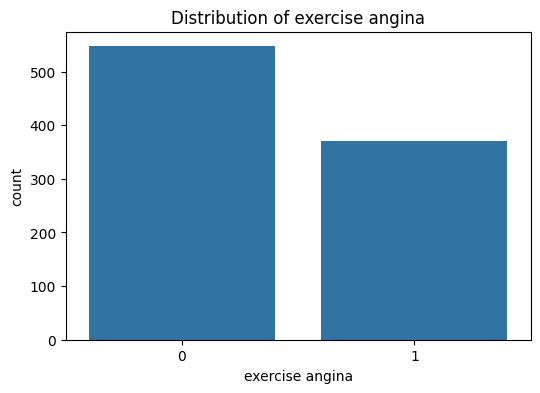

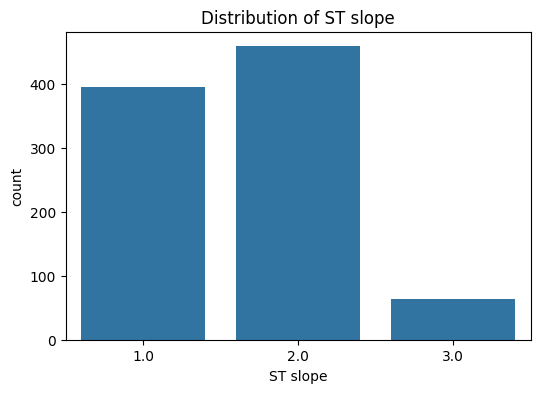

In [15]:
for column in categorical_vars_dropped:
    plt.figure(figsize = (6, 4))
    sns.countplot(x = data[column])
    plt.title(f'Distribution of {column}')
    plt.show()

### Age distribution by sex

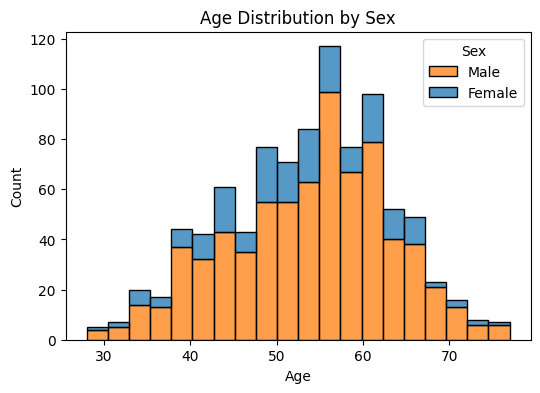

In [16]:
plt.figure(figsize = (6, 4))
sns.histplot(data = data, x = 'age', hue = 'sex', multiple = 'stack', bins = 20)
plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title = 'Sex', labels = ['Male', 'Female'])
plt.show()

### Categorical column distributions by heart disease existence

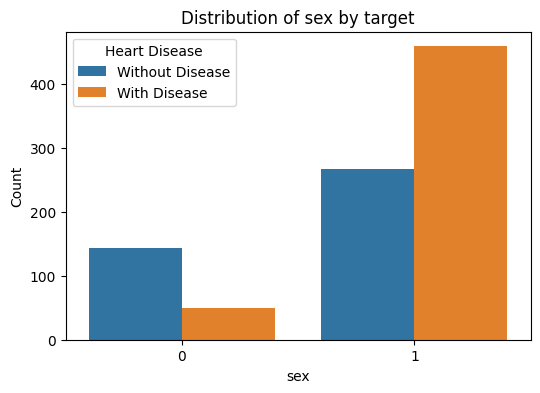

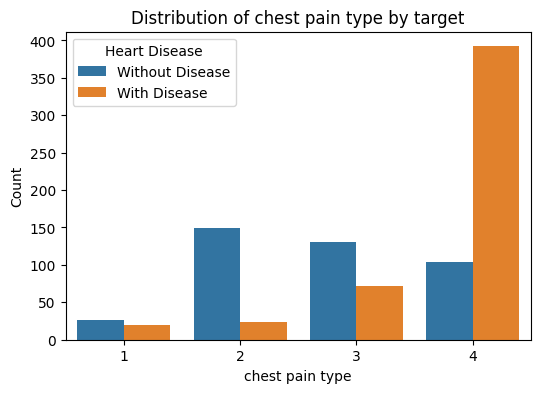

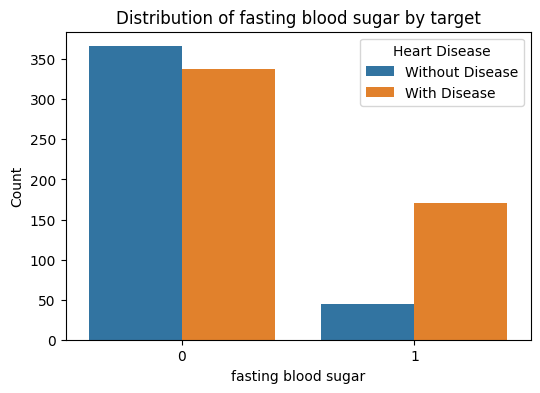

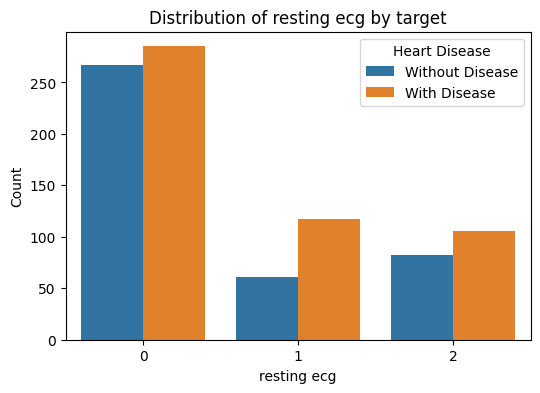

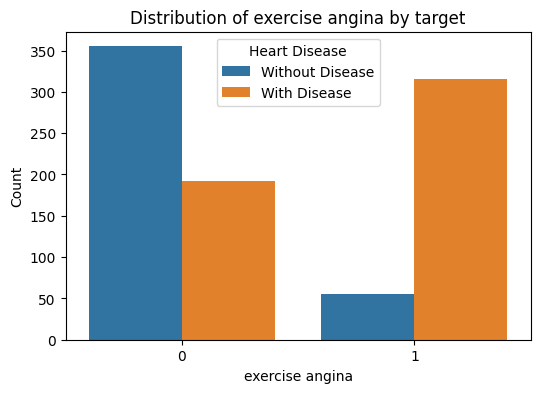

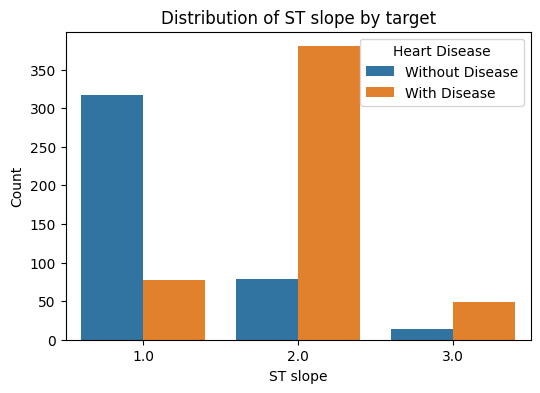

In [17]:
for column in categorical_vars_dropped:
    plt.figure(figsize = (6, 4))
    sns.countplot(data = data, x = column, hue = 'target')
    plt.title(f'Distribution of {column} by target')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title = 'Heart Disease', labels = ['Without Disease', 'With Disease'])
    plt.show()

### Boxplots for numerical columns

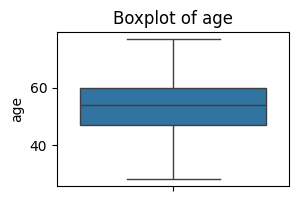

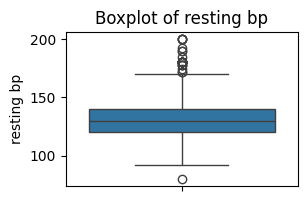

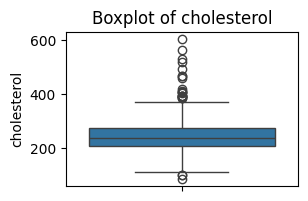

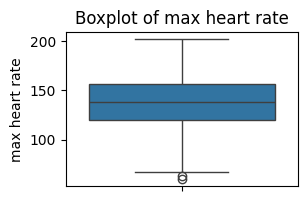

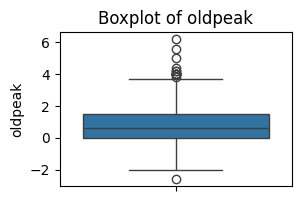

In [18]:
for col in numerical_vars:
    plt.figure(figsize = (3, 2))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [19]:
###Detect considerable number of oultiers
###Columns 'Resting blood pressure' and 'Serum cholesterol' can be imputed with 
    #KNN imputer

## Descriptive Statistics 

In [20]:
data[numerical_vars].describe()

,age,resting bp,cholesterol,max heart rate,oldpeak
count,918.000000,917.000000,746.000000,918.000000,918.000000
mean,53.510893,132.540894,244.635389,136.809368,0.887364
std,9.432617,17.999749,59.153524,25.460334,1.066570
min,28.000000,80.000000,85.000000,60.000000,-2.600000
25%,47.000000,120.000000,207.250000,120.000000,0.000000
50%,54.000000,130.000000,237.000000,138.000000,0.600000
75%,60.000000,140.000000,275.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


### Boxplot of maximum heart rate by exercise induced angina

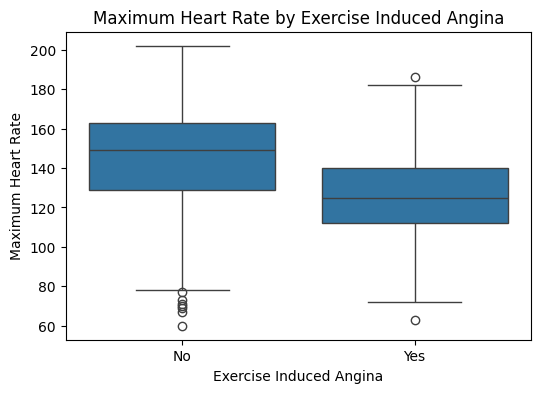

In [21]:
plt.figure(figsize = (6, 4))
sns.boxplot(data = data, x = 'exercise angina', y = 'max heart rate')
plt.title('Maximum Heart Rate by Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Maximum Heart Rate')
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
plt.show()

### Violin plot of old peak by ST slope

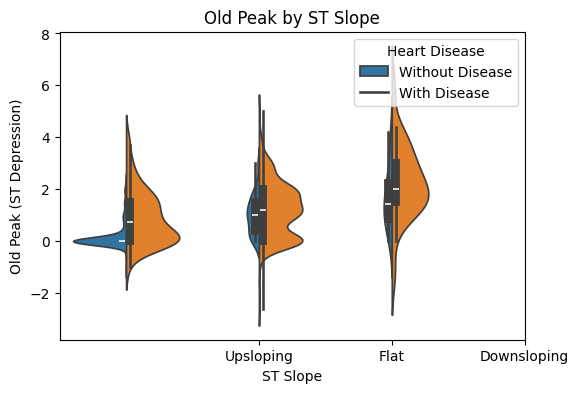

In [22]:
plt.figure(figsize = (6, 4))
sns.violinplot(data = data, x = 'ST slope', y = 'oldpeak', hue = 'target', split = True)
plt.title('Old Peak by ST Slope')
plt.xlabel('ST Slope')
plt.ylabel('Old Peak (ST Depression)')
plt.xticks(ticks = [1, 2, 3], labels = ['Upsloping', 'Flat', 'Downsloping'])
plt.legend(title = 'Heart Disease', labels = ['Without Disease', 'With Disease'])
plt.show()

### Pair plot of numerical variables coloured by heart disease existence

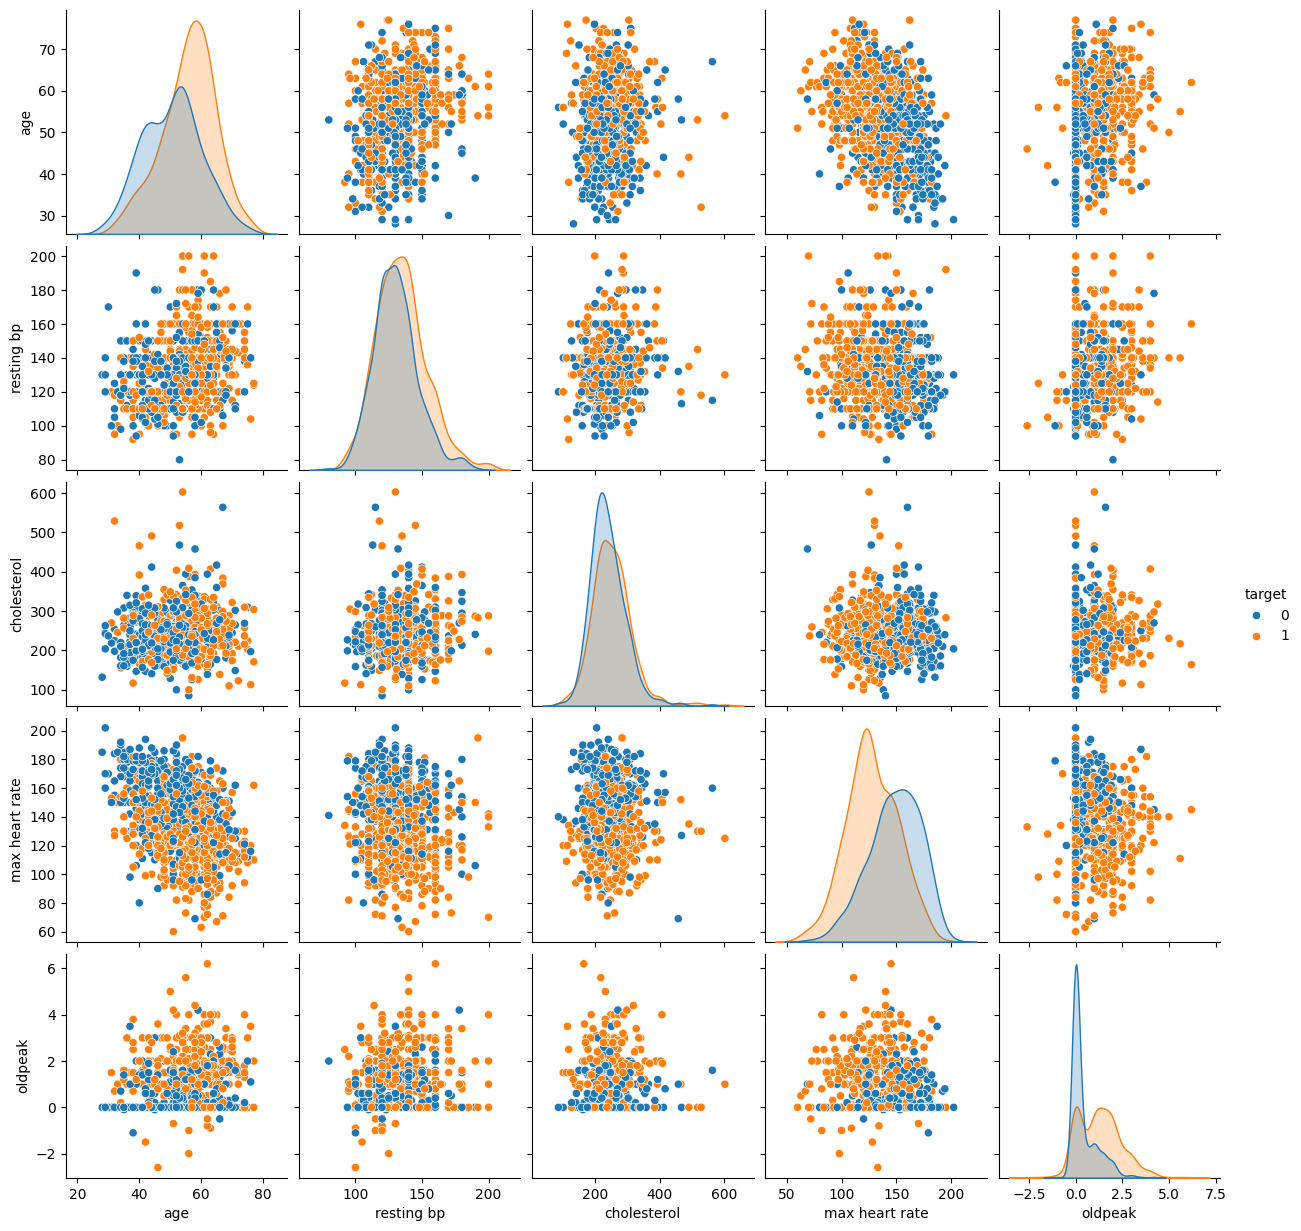

In [23]:
sns.pairplot(data, hue = 'target', diag_kind = 'kde')
plt.show()

In [24]:
###Perform MinMax scaling on numerical columns

### Correlation matrix on numerical variables

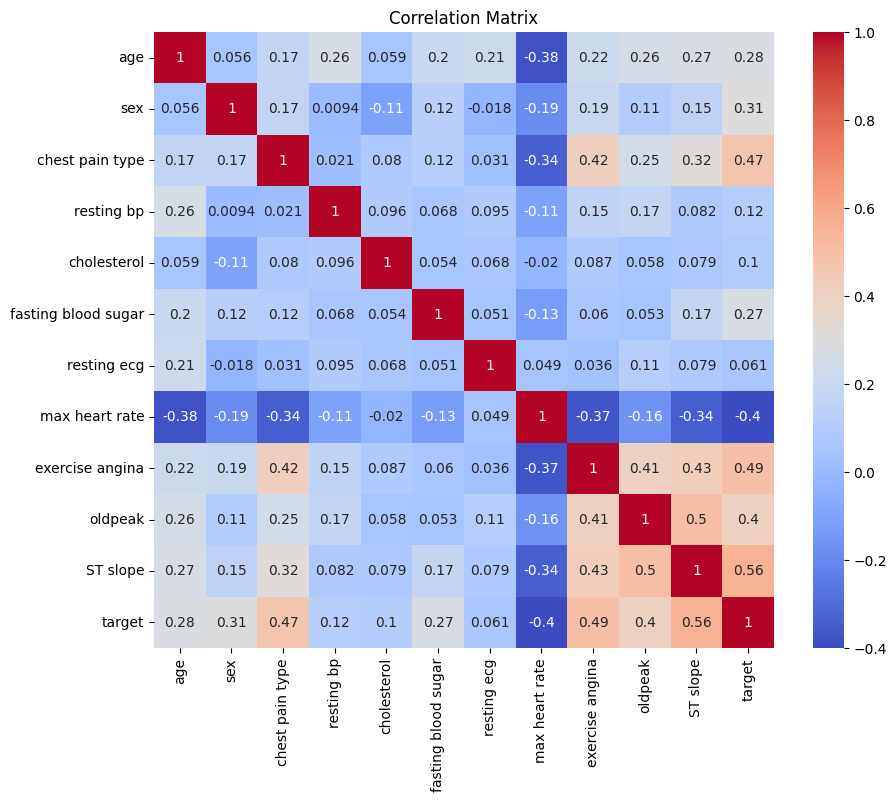

In [25]:
plt.figure(figsize = (10, 8)) 
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
###Highly correlated variables do not exist

## Handle numerical missing values with KNN imputer

In [27]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)
data[['resting bp', 'cholesterol']] = imputer.fit_transform(data[['resting bp', 
                                                                  'cholesterol']])

In [28]:
data.dtypes

age                       int64
sex                    category
chest pain type        category
resting bp              float64
cholesterol             float64
fasting blood sugar    category
resting ecg            category
max heart rate            int64
exercise angina        category
oldpeak                 float64
ST slope               category
target                    int64
dtype: object

## Handle categorical missing values with mode

In [29]:
data['ST slope'].fillna(data['ST slope'].mode()[0], inplace = True)

In [30]:
#Verification
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp             0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

## MinMax Scaling on numerical columns

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[numerical_vars] = scaler.fit_transform(data[numerical_vars])

In [32]:
#Change data type of 'ST slope' for identification purposes
data['ST slope'] = data['ST slope'].astype('int64')

In [33]:
#Verification
data.head()

,age,sex,chest pain type,resting bp,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.244898,1,2,0.500000,0.393822,0,0,0.788732,0,0.295455,1,0
1,0.428571,0,3,0.666667,0.183398,0,0,0.676056,0,0.409091,2,1
2,0.183673,1,2,0.416667,0.382239,0,1,0.267606,0,0.295455,1,0
3,0.408163,0,4,0.483333,0.249035,0,0,0.338028,1,0.465909,2,1
4,0.530612,1,3,0.583333,0.212355,0,0,0.436620,0,0.295455,1,0


## Encode categorical variables

In [34]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output = False)
#Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[categorical_vars_dropped])
#Create a DataFrame with the one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns = 
                          encoder.get_feature_names_out(categorical_vars_dropped))

#Reset the index of both dataframes to ensure alignment
data.reset_index(drop = True, inplace = True)
one_hot_df.reset_index(drop = True, inplace = True)

#Concatenate the one-hot encoded dataframe with the original dataframe
data = pd.concat([data, one_hot_df], axis = 1)
#Drop the original categorical columns
data = data.drop(categorical_vars_dropped, axis = 1)

#Verification
data.columns

Index(['age', 'resting bp', 'cholesterol', 'max heart rate', 'oldpeak',
       'target', 'sex_0', 'sex_1', 'chest pain type_1', 'chest pain type_2',
       'chest pain type_3', 'chest pain type_4', 'fasting blood sugar_0',
       'fasting blood sugar_1', 'resting ecg_0', 'resting ecg_1',
       'resting ecg_2', 'exercise angina_0', 'exercise angina_1', 'ST slope_1',
       'ST slope_2', 'ST slope_3'],
      dtype='object')

## Split the data into train and test

In [35]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis = 1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42)

## Train models with 'Feature Selection'

In [36]:
from sklearn.feature_selection import RFE

### 1. Logistic Regression model

In [37]:
from sklearn.linear_model import LogisticRegression

#Initialize model
lr = LogisticRegression(random_state = 42, penalty = 'l2')

#Feature selection using RFE with Logistic Regression
rfe = RFE(lr, n_features_to_select = 10)
rfe = rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

#Update training and testing sets with selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

#Fit and trasform data
lr.fit(X_train, y_train)

Selected features: Index(['age', 'max heart rate', 'oldpeak', 'sex_0', 'sex_1',
       'chest pain type_4', 'fasting blood sugar_0', 'exercise angina_0',
       'ST slope_1', 'ST slope_2'],
      dtype='object')


LogisticRegression(random_state=42)

### 2. Random Forest Classifier model

In [38]:
from sklearn.ensemble import RandomForestClassifier

#Initialize model
rf = RandomForestClassifier(random_state = 42)

#Feature selection using RFE with Logistic Regression
rfe = RFE(rf, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

#Update training and testing sets with selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

#Fit and trasform data
rf.fit(X_train, y_train)

Selected features: Index(['age', 'max heart rate', 'oldpeak', 'sex_0', 'sex_1',
       'chest pain type_4', 'fasting blood sugar_0', 'exercise angina_0',
       'ST slope_1', 'ST slope_2'],
      dtype='object')


RandomForestClassifier(random_state=42)

### 3. Support Vector Machine (SVM) model

In [39]:
from sklearn.svm import SVC

#Initialize model
svm = SVC(kernel = 'linear', random_state = 42, probability = True)

#Feature selection using RFE with Logistic Regression
rfe = RFE(svm, n_features_to_select = 10)
rfe = rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

#Update training and testing sets with selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

#Fit and trasform data
svm.fit(X_train, y_train)

Selected features: Index(['age', 'max heart rate', 'oldpeak', 'sex_0', 'sex_1',
       'chest pain type_4', 'fasting blood sugar_0', 'exercise angina_0',
       'ST slope_1', 'ST slope_2'],
      dtype='object')


SVC(kernel='linear', probability=True, random_state=42)

### 4. K Nearest Neighbors (KNN) Classifier Model

In [40]:
from sklearn.neighbors import KNeighborsClassifier 

#Initialize model
knn = KNeighborsClassifier(n_neighbors = 2)

#Fit and trasform data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

### 5. Gaussian Naive Bayes Model

In [41]:
from sklearn.naive_bayes import GaussianNB

#Initialize model
gnb = GaussianNB()

#Fit and trasform data
gnb.fit(X_train, y_train)

GaussianNB()

### 6. Decision Tree Model

In [42]:
from sklearn.tree import DecisionTreeClassifier

#Initialize model
decision = DecisionTreeClassifier(random_state = 42)

#Feature selection using RFE with Logistic Regression
rfe = RFE(decision, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

#Update training and testing sets with selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

#Fit and trasform data
decision.fit(X_train, y_train)

Selected features: Index(['age', 'max heart rate', 'oldpeak', 'sex_0', 'sex_1',
       'chest pain type_4', 'fasting blood sugar_0', 'exercise angina_0',
       'ST slope_1', 'ST slope_2'],
      dtype='object')


DecisionTreeClassifier(random_state=42)

## Hyperparameter tuning & Cross Validation for models

In [43]:
from sklearn.model_selection import GridSearchCV

### 1. Logistic Regression model

In [44]:
#Define hyperparameter grids
param_grid_lr = {
    'C': [0.9, 1], 
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [1000, 1100]
}

#Perform GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv = 10, n_jobs = -1, 
                              scoring = 'accuracy')
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
best_lr_params = grid_search_lr.best_params_
print("LR best parameters: ", best_lr_params)

LR best parameters:  {'C': 0.9, 'max_iter': 1000, 'solver': 'newton-cg'}


### 2. Random Forest Classifier model

In [45]:
#Define hyperparameter grids
param_grid_rf = {
    'n_estimators': [49, 50, 51],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 2],
    'min_samples_split': [13, 14, 15],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None],
}

#Perform GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv = 20, n_jobs = -1, 
                              scoring = 'accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_
print("RF best parameters: ", best_rf_params)

RF best parameters:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 14, 'n_estimators': 51}


### 3. Support Vector Machine model

In [46]:
#Define hyperparameter grids
param_grid_svm = {
    'C': [10, 11, 12],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

#Perform GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv = 10, n_jobs = -1, 
                               scoring = 'accuracy')
grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_
best_svm_params = grid_search_svm.best_params_
print("SVM best parameters: ", best_svm_params)

SVM best parameters:  {'C': 10, 'kernel': 'poly'}


### 4. K Nearest Neighbours Model

In [47]:
#Define hyperparameter grids
param_grid_knn = {
    'n_neighbors': [16, 17, 18],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [1, 2],
    'p': [1, 2]
}

#Perform GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv = 10, n_jobs = -1, 
                               scoring = 'accuracy')
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
best_knn_params = grid_search_knn.best_params_
print("KNN best parameters: ", best_knn_params)

KNN best parameters:  {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 17, 'p': 1, 'weights': 'uniform'}


### 5. Gaussian Naive Bayes Model

In [48]:
param_grid_gnb = {
    'var_smoothing': [1e-323, 1e-322]
}

#Perform GridSearchCV
grid_search_gnb = GridSearchCV(gnb, param_grid_gnb, cv = 10, n_jobs = -1, 
                               scoring = 'accuracy')
grid_search_gnb.fit(X_train, y_train)
best_gnb = grid_search_gnb.best_estimator_
best_gnb_params = grid_search_gnb.best_params_
print("GNB best parameters: ", best_gnb_params)

GNB best parameters:  {'var_smoothing': 1e-323}


### 6. Decision Tree Model

In [49]:
param_grid_decision = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [3, 4, 5],
    'min_samples_split': [6, 7, 8],  
    'min_samples_leaf': [2, 3, 4], 
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced'] 
}

#Perform GridSearchCV
grid_search_decision = GridSearchCV(decision, param_grid_decision, cv = 10, 
                                    n_jobs = -1, scoring = 'accuracy')
grid_search_decision.fit(X_train, y_train)
best_decision = grid_search_decision.best_estimator_
best_decision_params = grid_search_decision.best_params_
print("Decision Tree best parameters: ", best_decision_params)

Decision Tree best parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6}


## Predictions & Evaluations on test data

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

### 1. Logistic Regression model

Logistic Regression Model:
Accuracy: 86.95652173913044
Confusion Matrix:
 [[68  9]
 [15 92]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.88      0.85        77
           1       0.91      0.86      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



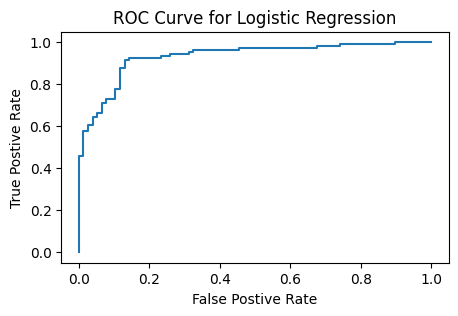

93.13023425172958


In [51]:
#Predict
y_pred_lr = best_lr.predict(X_test) 

#Evaluate
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:", classification_report(y_test, y_pred_lr))

#Get y_pred probabilities
y_pred_probs_lr = best_lr.predict_proba(X_test)
#Get values for 'false positive rate', 'true positive rate'
fpr, tpr, _ = roc_curve(y_test, y_pred_probs_lr[:,1]) 
#Plot ROC curve
plt.figure(figsize = (5,3))
plt.plot(fpr, tpr)
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.show() 

#Get AUC value
print(roc_auc_score(y_test, y_pred_probs_lr[:,1])*100)

### 2. Random Forest Classifier model

Random Forest Classifier model:
Accuracy: 83.69565217391305
Confusion Matrix:
 [[65 12]
 [18 89]]
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.84      0.81        77
           1       0.88      0.83      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



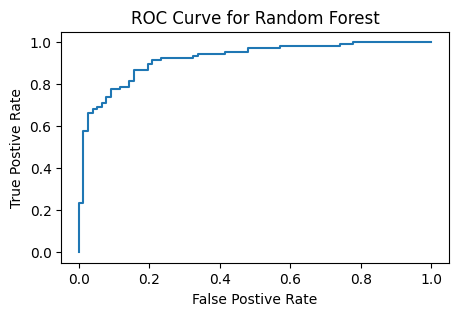

92.13496783590242


In [52]:
#Predict
y_pred_rf = best_rf.predict(X_test) 

#Evaluate
print("Random Forest Classifier model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:", classification_report(y_test, y_pred_rf))

#Get y_pred probabilities
y_pred_probs_rf = best_rf.predict_proba(X_test)
#Get values for 'false positive rate', 'true positive rate'
fpr, tpr, _ = roc_curve(y_test, y_pred_probs_rf[:,1]) 
#Plot ROC curve
plt.figure(figsize = (5,3))
plt.plot(fpr, tpr)
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.title("ROC Curve for Random Forest")
plt.show()

#Get AUC value
print(roc_auc_score(y_test, y_pred_probs_rf[:,1])*100)

### 3. Support Vector Machine model

Support Vector Machine model:
Accuracy: 85.86956521739131
Confusion Matrix:
 [[68  9]
 [17 90]]
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



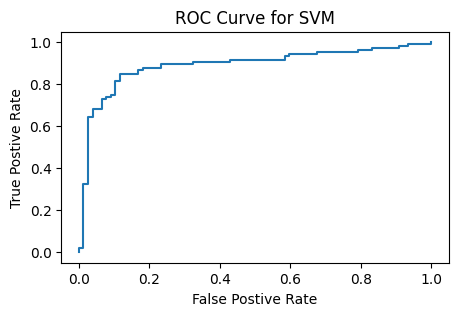

88.96710765869645


In [53]:
#Predict
y_pred_svm = svm.predict(X_test) 

#Evaluate
print("Support Vector Machine model:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:", classification_report(y_test, y_pred_svm))

#Get y_pred probabilities
y_pred_probs_svm = best_svm.predict_proba(X_test)
#Get values for 'false positive rate', 'true positive rate'
fpr, tpr, _ = roc_curve(y_test, y_pred_probs_svm[:,1]) 
#Plot ROC curvev
plt.figure(figsize = (5,3))
plt.plot(fpr, tpr)
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.title("ROC Curve for SVM")
plt.show()

#Get AUC value
print(roc_auc_score(y_test, y_pred_probs_svm[:,1])*100)

### 4. K Nearest Neighbours Model

K Nearest Neighbours Model:
Accuracy: 77.17391304347827
Confusion Matrix:
 [[74  3]
 [39 68]]
Classification Report:               precision    recall  f1-score   support

           0       0.65      0.96      0.78        77
           1       0.96      0.64      0.76       107

    accuracy                           0.77       184
   macro avg       0.81      0.80      0.77       184
weighted avg       0.83      0.77      0.77       184



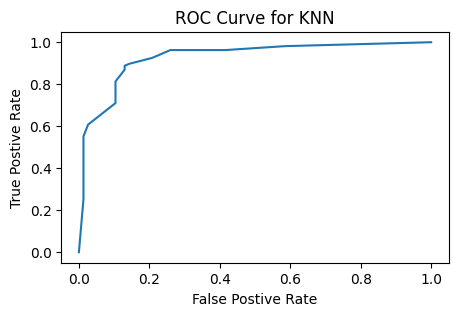

92.79645588056802


In [54]:
#Predict
y_pred_knn = knn.predict(X_test) 

#Evaluate
print("K Nearest Neighbours Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:", classification_report(y_test, y_pred_knn))

#Get y_pred probabilities
y_pred_probs_knn = best_knn.predict_proba(X_test)
#Get values for 'false positive rate', 'true positive rate'
fpr, tpr, _ = roc_curve(y_test, y_pred_probs_knn[:,1]) 
#Plot ROC curve
plt.figure(figsize = (5,3))
plt.plot(fpr, tpr)
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.title("ROC Curve for KNN")
plt.show()

#Get AUC value
print(roc_auc_score(y_test, y_pred_probs_knn[:,1])*100)

### 5. Gaussian Naive Bayes Model

Gaussian Naive Bayes Model:
Accuracy: 85.32608695652173
Confusion Matrix:
 [[67 10]
 [17 90]]
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



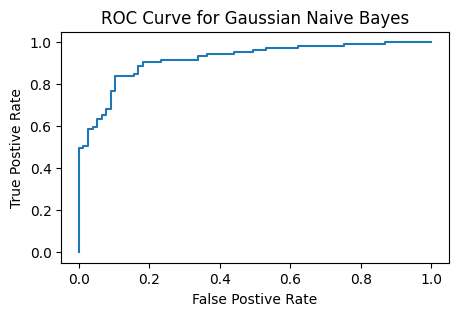

91.88008253428814


In [55]:
#Predict
y_pred_gnb = gnb.predict(X_test) 

#Evaluate
print("Gaussian Naive Bayes Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("Classification Report:", classification_report(y_test, y_pred_gnb))

#Get y_pred probabilities
y_pred_probs_gnb = best_gnb.predict_proba(X_test)
#Get values for 'false positive rate', 'true positive rate'
fpr, tpr, _ = roc_curve(y_test, y_pred_probs_gnb[:,1]) 
#Plot ROC curve
plt.figure(figsize = (5,3))
plt.plot(fpr, tpr)
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.title("ROC Curve for Gaussian Naive Bayes")
plt.show()

#Get AUC value
print(roc_auc_score(y_test, y_pred_probs_gnb[:,1])*100)

### 6. Decision Tree Model

Decision Tree Model:
Accuracy: 76.63043478260869
Confusion Matrix:
 [[66 11]
 [32 75]]
Classification Report:               precision    recall  f1-score   support

           0       0.67      0.86      0.75        77
           1       0.87      0.70      0.78       107

    accuracy                           0.77       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.79      0.77      0.77       184



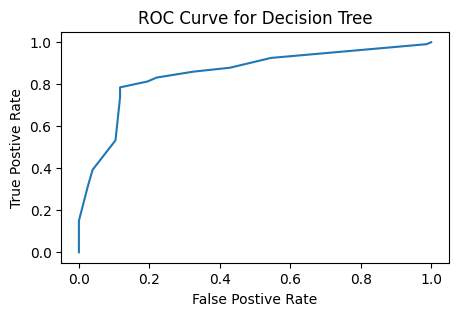

85.21058380871465


In [56]:
#Predict
y_pred_decision = decision.predict(X_test) 

#Evaluate
print("Decision Tree Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_decision)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_decision))
print("Classification Report:", classification_report(y_test, y_pred_decision))

#Get y_pred probabilities
y_pred_probs_decision = best_decision.predict_proba(X_test)
#Get values for 'false positive rate', 'true positive rate'
fpr, tpr, _ = roc_curve(y_test, y_pred_probs_decision[:,1]) 
#Plot ROC curve
plt.figure(figsize = (5,3))
plt.plot(fpr, tpr)
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.title("ROC Curve for Decision Tree")
plt.show()

#Get AUC value
print(roc_auc_score(y_test, y_pred_probs_decision[:,1])*100)

## Conclusion

In [57]:
'''
According to the highest accuracy and other evaluation metrics like precision, recall,  
F1-score, ROC curve and AUC value, the most suitable (3 best) models would be LR, SVM 
and Gaussian Naive Bayes. (with around 85% of accuracy)
'''

'\nAccording to the highest accuracy and other evaluation metrics like precision, recall,  \nF1-score, ROC curve and AUC value, the most suitable (3 best) models would be LR, SVM \nand Gaussian Naive Bayes. (with around 85% of accuracy)\n'

## Combine predictions of LR, SVM and GNB models using an ensemble method

Voting Classifier Model:
Accuracy: 85.32608695652173
Confusion Matrix:
 [[67 10]
 [17 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



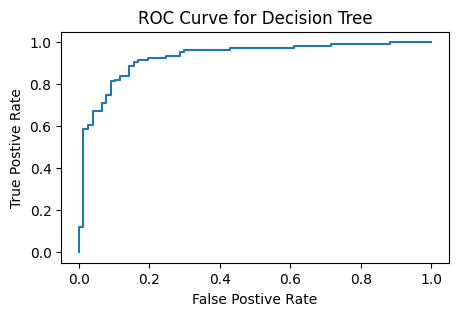

92.83893676417041


In [58]:
from sklearn.ensemble import VotingClassifier

estimators = [('lr', best_lr), ('svm', best_svm), ('gnb', best_gnb)]
voting_clf = VotingClassifier(estimators = estimators, voting = 'soft') 
#"Soft" - For voting in averaging probabilities
voting_clf.fit(X_train, y_train)

#Make predictions
y_pred_voting_clf = voting_clf.predict(X_test)

#Evaluate the ensemble model
print("Voting Classifier Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_voting_clf) * 100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting_clf))
print("Classification Report:\n", classification_report(y_test, y_pred_voting_clf))

#Get y_pred probabilities
y_pred_probs_voting_clf = voting_clf.predict_proba(X_test)
#Get values for 'false positive rate', 'true positive rate'
fpr, tpr, _ = roc_curve(y_test, y_pred_probs_voting_clf[:,1]) 
#Plot ROC 
plt.figure(figsize = (5,3))
plt.plot(fpr, tpr)
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.title("ROC Curve for Decision Tree")
plt.show()

#Get AUC value
print(roc_auc_score(y_test, y_pred_probs_voting_clf[:,1])*100)

## Predict a new observation (whether an individual has heart disease or not)

In [59]:
#Create new observation
feature_names = ['age', 'sex', 'chest pain type', 'resting bp', 'cholesterol', 
                 'fasting blood sugar', 'resting ecg', 'max heart rate', 
                 'exercise angina', 'oldpeak', 'ST slope']                   
new_obs = np.array([[55, 1, 2, 187, 215, 1, 2, 125, 0, 0.4, 1]])

#Convert new observation to DataFrame
new_obs_data = pd.DataFrame(new_obs, columns = feature_names)

#Perform MinMax Scaling as before
new_obs_data[numerical_vars] = scaler.transform(new_obs_data[numerical_vars])

#Encode categorical variables as before
new_obs_encoded = pd.get_dummies(new_obs_data, 
                                 columns = ['sex', 'chest pain type', 
                                            'fasting blood sugar', 'resting ecg', 
                                            'exercise angina', 'ST slope'])

#Align the new observation with the training data columns
new_obs_encoded = new_obs_encoded.reindex(columns = X_train.columns, fill_value = 0)

#Make predicting using LR, SVM and GNB models seperately
pred_lr = best_lr.predict(new_obs_encoded)
print("LR Prediction: ", pred_lr[0])
pred_svm = best_svm.predict(new_obs_encoded)
print("SVM Prediction: ", pred_svm[0])
pred_gnb = best_gnb.predict(new_obs_encoded)
print("GNB Prediction: ", pred_gnb[0])

#Predicting using ensemble model
predict_voting = voting_clf.predict(new_obs_encoded)
print("Ensemble Model Prediction ", predict_voting[0])

LR Prediction:  1
SVM Prediction:  1
GNB Prediction:  1
Ensemble Model Prediction  1


### The ensemble model predicts that the individual with given diagnosis is a patient.